# <center> **Capstone Project - Part 3** </center>
## <center> **PySpark** </center>

## **Olympics Datase Analysis using PySpark**

### **Introduction**
> We will use the csv file olympic_data.csv from our Capstone part 2, which contains cleaned data form previous file which was having duplicates and missing values and perform analysis of data using PySpark. 

**This Olympic_data.csv file contains the data of Olympic Medal Winner's record for the year 2000 to 2012.** This includes names of the athletes, age, country, sports which they have participated, count of diffrent types of medal won by them. With the help of PySpark we will analyze our dataset in the form of quetions provied.


### **Objective of the Project:**

• To read the olympix_data.csv file into PySpark as a dataframe.

• To find out the number Sports included in Olympic.

• To plot the total number of medals in each Olympic Sport and sort in descending order based on the total no. of medals.

• To find the total number of medals won by each country in Swimming and Skelton.

• To find the number of medals US won yearly.

• To find out the total number of medals won by each country.

• To check for the oldest athlete in the Olympics and country he\she belongs.

In [ ]:
pip install pyspark                         #Installing Pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 35 kB/s 
     |████████████████████████████████| 199 kB 66.9 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=abdc55adab25ecd9d56dcea1854905a8ee8a4edf8d5a92e44626f35f84758004
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [ ]:
#Initializing PySpark
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext

#Spark Config
conf = SparkConf().setAppName("sample_app")
sc = SparkContext(conf=conf)
spark = SparkSession.builder.appName('Test').getOrCreate()
sqlContext = SQLContext(sc)

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:114: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning,


In [ ]:
df = spark.read.format("csv").option("header","true").option("inferSchema","true").option("delimeter",",").load("/content/olympic_data.csv") 
df.show()
#Reading the csv file of the data

+--------------------+----+-------------+----+----------+--------------------+----------+------------+-----------+-----------+
|                name| age|      country|year|Date_Given|              sports|gold_medal|silver_medal|brone_medal|total_medal|
+--------------------+----+-------------+----+----------+--------------------+----------+------------+-----------+-----------+
|      Michael Phelps|23.0|United States|2008| 8/24/2008|            Swimming|         8|           0|          0|          8|
|      Michael Phelps|19.0|United States|2004| 8/29/2004|            Swimming|         6|           0|          2|          8|
|      Michael Phelps|27.0|United States|2012|08-12-2012|            Swimming|         4|           2|          0|          6|
|    Natalie Coughlin|25.0|United States|2008| 8/24/2008|            Swimming|         1|           2|          3|          6|
|       Aleksey Nemov|24.0|       Russia|2000|10-01-2000|          Gymnastics|         2|           1|         

In [ ]:
df.printSchema()           #to check data type of the df

root
 |-- name: string (nullable = true)
 |-- age: double (nullable = true)
 |-- country: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- Date_Given: string (nullable = true)
 |-- sports: string (nullable = true)
 |-- gold_medal: integer (nullable = true)
 |-- silver_medal: integer (nullable = true)
 |-- brone_medal: integer (nullable = true)
 |-- total_medal: integer (nullable = true)



### Write PySpark code to print the Olympic Sports/games in the dataset.

We will use map() to perform distinct() operation on each row with the help of lambda funtion.

In [ ]:
df.select('sports').distinct().rdd.map(lambda r: r[0]).collect()

['Gymnastics',
 'Tennis',
 'Boxing',
 'Short-Track Speed Skating',
 'Ice Hockey',
 'Rowing',
 'Judo',
 'Softball',
 'Sailing',
 'Swimming',
 'Alpine Skiing',
 'Basketball',
 'Handball',
 'Rhythmic Gymnastics',
 'Biathlon',
 'Triathlon',
 'Badminton',
 'Athletics',
 'Figure Skating',
 'Beach Volleyball',
 'Equestrian',
 'Shooting',
 'Diving',
 'Skeleton',
 'Ski Jumping',
 'Nordic Combined',
 'Wrestling',
 'Speed Skating',
 'Table Tennis',
 'Taekwondo',
 'Canoeing',
 'Weightlifting',
 'Waterpolo',
 'Baseball',
 'Modern Pentathlon',
 'Snowboarding',
 'Bobsleigh',
 'Cycling',
 'Cross Country Skiing',
 'Volleyball',
 'Archery',
 'Synchronized Swimming',
 'Curling',
 'Fencing',
 'Hockey',
 'Freestyle Skiing',
 'Football',
 'Luge',
 'Trampoline']

### Write PySpark code to plot the total number of medals in  each Olympic Sport/game

**We will use groupBy() for sports column and use sum() on totao_medal column and create a new dataframe.** 

In [ ]:
from pyspark.sql.functions import sum
dfPlot =df.groupBy("sports").agg(sum("total_medal").alias("total number of medals"))
dfPlot.show()

+--------------------+----------------------+
|              sports|total number of medals|
+--------------------+----------------------+
|          Gymnastics|                   282|
|              Tennis|                    78|
|              Boxing|                   188|
|Short-Track Speed...|                   138|
|          Ice Hockey|                   384|
|              Rowing|                   576|
|                Judo|                   224|
|            Softball|                   134|
|             Sailing|                   210|
|            Swimming|                   765|
|       Alpine Skiing|                    90|
|          Basketball|                   287|
|            Handball|                   351|
| Rhythmic Gymnastics|                    84|
|            Biathlon|                   138|
|           Triathlon|                    24|
|           Badminton|                    96|
|           Athletics|                   753|
|      Figure Skating|            

**Importing necessary libraries i.e. pandas and matplotlib to plot the total number of medals in each Olympic Sport.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt  

**We will convert PySpark dataframe to pandas dataframe using .toPandas()**

In [ ]:
pandasdf = dfPlot.toPandas()
pandasdf.head()

,sports,total number of medals
0,Gymnastics,282
1,Tennis,78
2,Boxing,188
3,Short-Track Speed Skating,138
4,Ice Hockey,384


**We will use barplot to plot the  the total number of medals in each Olympic Sport.**

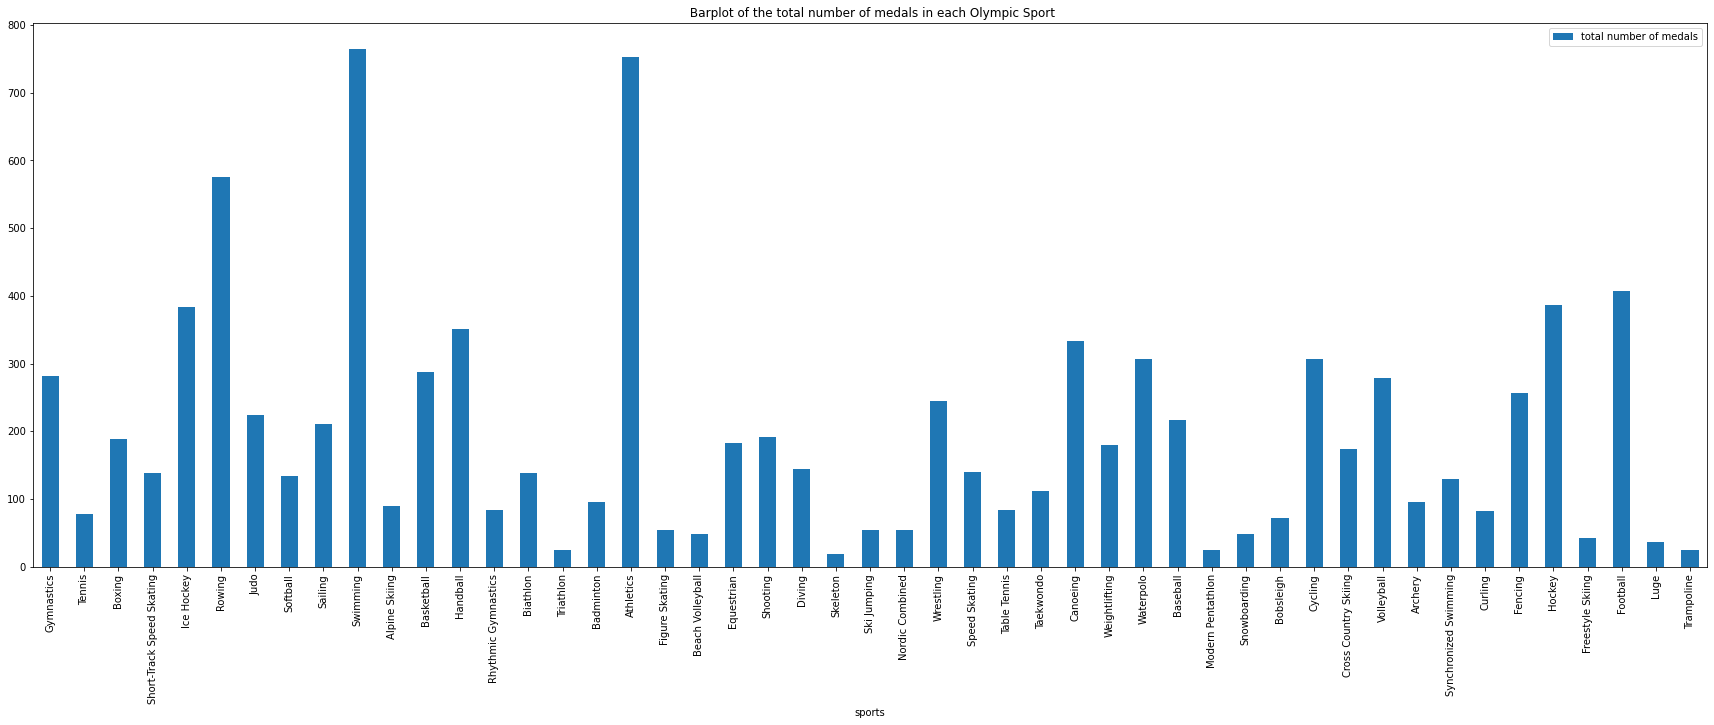

In [ ]:
pandasdf.plot.bar(x='sports',y='total number of medals',figsize=(30,10))
plt.title(" Barplot of the total number of medals in each Olympic Sport")
plt.show()

### Sort the result based on the total number of medals. 

We will use groupby() and sort() 

In [ ]:
from pyspark.sql.functions import desc
df.groupBy("sports").sum("total_medal").sort(desc("sum(total_medal)")).show(50)

+--------------------+----------------+
|              sports|sum(total_medal)|
+--------------------+----------------+
|            Swimming|             765|
|           Athletics|             753|
|              Rowing|             576|
|            Football|             407|
|              Hockey|             387|
|          Ice Hockey|             384|
|            Handball|             351|
|            Canoeing|             333|
|           Waterpolo|             306|
|             Cycling|             306|
|          Basketball|             287|
|          Gymnastics|             282|
|          Volleyball|             279|
|             Fencing|             256|
|           Wrestling|             245|
|                Judo|             224|
|            Baseball|             216|
|             Sailing|             210|
|            Shooting|             192|
|              Boxing|             188|
|          Equestrian|             182|
|       Weightlifting|             180|


### Find the total number of medals won by each country in swimming.


We will use groupby() on country and sports column and filter the sports value equals to Swimming. 


In [ ]:
#import col
from pyspark.sql.functions import col
df.groupBy("country","sports").sum("total_medal").filter(col('sports') == 'Swimming').show(50)

+-------------------+--------+----------------+
|            country|  sports|sum(total_medal)|
+-------------------+--------+----------------+
|            Croatia|Swimming|               1|
|          Australia|Swimming|             163|
|              Japan|Swimming|              43|
|            Denmark|Swimming|               1|
|           Slovenia|Swimming|               1|
|        South Korea|Swimming|               4|
|          Lithuania|Swimming|               1|
|Trinidad and Tobago|Swimming|               1|
|            Romania|Swimming|               6|
|           Slovakia|Swimming|               2|
|             France|Swimming|              39|
|             Sweden|Swimming|               9|
|            Hungary|Swimming|               9|
|              Italy|Swimming|              16|
|             Norway|Swimming|               2|
|         Costa Rica|Swimming|               2|
|          Argentina|Swimming|               1|
|             Brazil|Swimming|          

### Find the total number of medals won by each country in Skeleton.

We will use groupby() on country and sports column and filter the sports value equals to Skeleton. 

In [ ]:
df.groupBy("country","sports").sum("total_medal").filter(col('sports') == 'Skeleton').show(50)

+-------------+--------+----------------+
|      country|  sports|sum(total_medal)|
+-------------+--------+----------------+
|       Canada|Skeleton|               4|
|       Russia|Skeleton|               1|
|United States|Skeleton|               3|
|      Germany|Skeleton|               2|
|       Latvia|Skeleton|               1|
|      Austria|Skeleton|               1|
|Great Britain|Skeleton|               3|
|  Switzerland|Skeleton|               3|
+-------------+--------+----------------+



### Find the number of medals that the US won yearly.

We will use groupby() on country and year column and filter the country value equals to United States. 

In [ ]:
df.groupBy("country","year").sum("total_medal").filter(col('country') == 'United States').show()

+-------------+----+----------------+
|      country|year|sum(total_medal)|
+-------------+----+----------------+
|United States|2012|             254|
|United States|2002|              84|
|United States|2000|             243|
|United States|2008|             317|
|United States|2010|              97|
|United States|2006|              52|
|United States|2004|             265|
+-------------+----+----------------+



### Find the total number of medals won by each country.

We will use groupby() to find out total number of medals won by each country. We can select value for show() as the count of the country i.e. 110 to fetch all country name in the output.

In [ ]:
df.groupBy("country").sum("total_medal").show()           #using groupby()

+--------------+----------------+
|       country|sum(total_medal)|
+--------------+----------------+
|        Russia|             768|
|      Paraguay|              17|
|Chinese Taipei|              20|
|        Sweden|             181|
|       Eritrea|               1|
|     Singapore|               7|
|      Malaysia|               3|
|        Turkey|              28|
|       Germany|             629|
|   Afghanistan|               2|
|         Sudan|               1|
|        France|             318|
|        Greece|              59|
|     Sri Lanka|               1|
|       Algeria|               8|
|          Togo|               1|
|      Slovakia|              35|
|     Argentina|             140|
|       Belgium|              18|
| Great Britain|             322|
+--------------+----------------+
only showing top 20 rows



### Who was the oldest athlete in the olympics? 

To find out the oldest athlete in Olympics, we will select the name and age column using select() and then we will sort age column in descending order using sort().

In [ ]:
df.select('name',"age").sort(desc("age")).show(5)

+--------------------+----+
|                name| age|
+--------------------+----+
|          Ian Millar|61.0|
|           Mark Todd|56.0|
|            Mac Cone|55.0|
|        Nick Skelton|54.0|
|Lesley Thompson-W...|52.0|
+--------------------+----+
only showing top 5 rows



From above, we know that the **Ian Millar is the oldest athlete having age of 61.**

### Which country was he/she from?

In [ ]:
#selecting country column to find out the country of oldest athlete
df.select('name',"age","country").sort(desc("age")).show(1)            

+----------+----+-------+
|      name| age|country|
+----------+----+-------+
|Ian Millar|61.0| Canada|
+----------+----+-------+
only showing top 1 row



From above, we can see that Ian Millar is from **Canada**.

### Conclusion:

• We were able to analyse data successfully using different functions of the PySpark. 

• We have seen visualization for our PySpark dataframe using pandas matplotlib.

***
## <center> **Thank You!** </center>